PROJECT :Unveiling the Android App Market: Analyzing Google Play Store Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

playstore_data = pd.read_csv('/content/apps.csv')
playstore_data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:

playstore_data.drop_duplicates(inplace=True)

In [5]:
# Handle missing values
playstore_data.dropna(inplace=True)

In [6]:
# Convert 'Size' column to numeric (removing 'M', 'k' and '+')
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(x))

In [7]:
# Convert 'Price' column to numeric (removing '$')
playstore_data['Price'] = playstore_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
playstore_data['Price'] = playstore_data['Price'].apply(lambda x: float(x))

In [8]:
genre_counts = playstore_data['Genres'].value_counts().nlargest(10)
print("Top 10 Genres:")
print(genre_counts)

Top 10 Genres:
Genres
Tools              625
Entertainment      417
Education          391
Action             276
Personalization    274
Lifestyle          268
Medical            266
Finance            258
Sports             227
Productivity       223
Name: count, dtype: int64


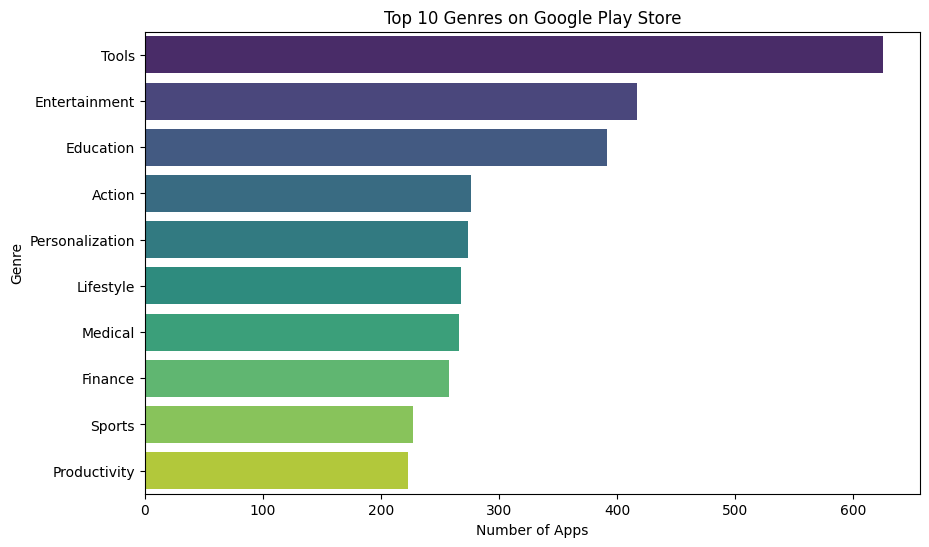

In [10]:
# Step 4: Data Visualization
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Genres on Google Play Store')
plt.xlabel('Number of Apps')
plt.ylabel('Genre')
plt.show()


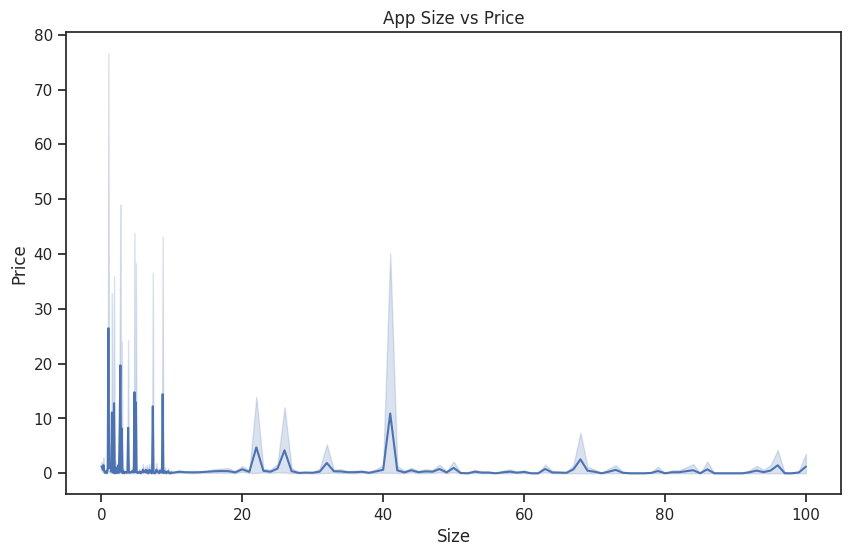

In [36]:
# Plotting a scatter plot for Size vs Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='Size', y='Price', data=playstore_data)
plt.title('App Size vs Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

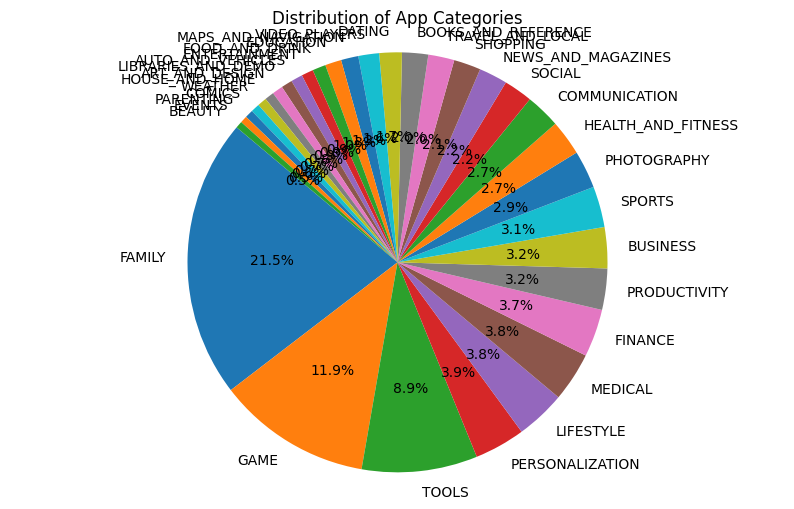

In [15]:

# Plotting a pie chart for app categories
category_counts = playstore_data['Category'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of App Categories')
plt.axis('equal')
plt.show()

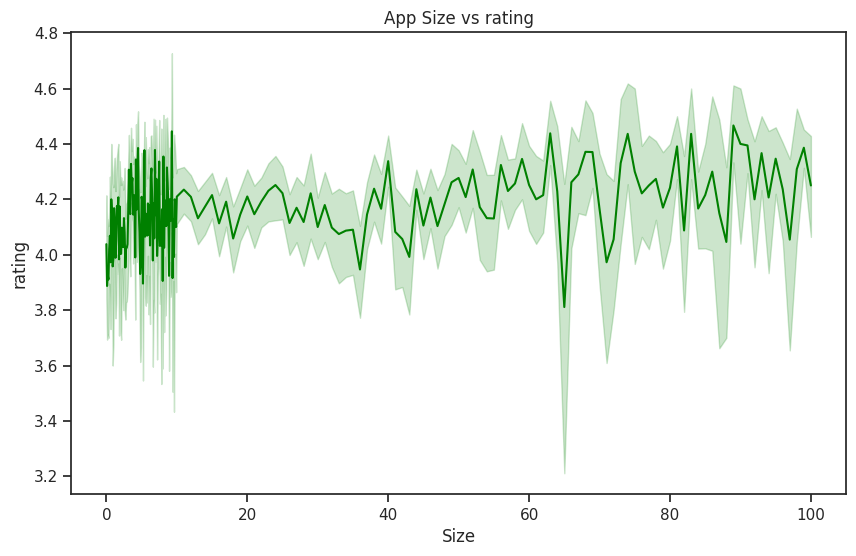

In [39]:
# Plotting a scatter plot for Size vs rating
plt.figure(figsize=(10, 6))
sns.lineplot(x='Size', y='Rating', data=playstore_data,color="green")
plt.title('App Size vs rating')
plt.xlabel('Size')
plt.ylabel('rating')
plt.show()


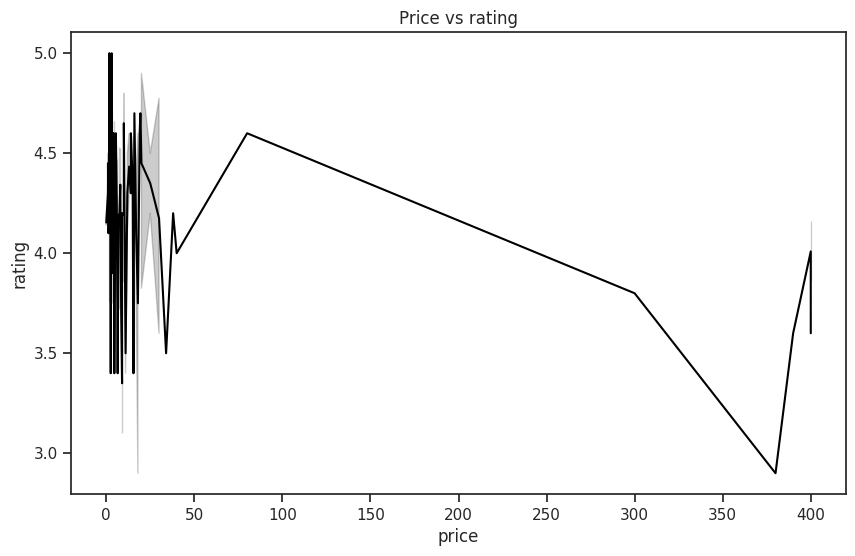

In [41]:
# Plotting a scatter plot for Size vs rating
plt.figure(figsize=(10, 6))
sns.lineplot(x='Price', y='Rating', data=playstore_data,color="black")
plt.title('Price vs rating')
plt.xlabel('price')
plt.ylabel('rating')
plt.show()


**Sentiment Analysis**

In [42]:
from textblob import TextBlob

In [43]:
# Step 1: Data Loading
playstore_reviews = pd.read_csv('/content/user_reviews.csv')
playstore_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [44]:
# Step 2: Data Preprocessing
# Remove rows with missing values in 'Translated_Review' column
playstore_reviews.dropna(subset=['Translated_Review'], inplace=True)

In [46]:
# Step 3: Sentiment Scoring
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [47]:
# Apply sentiment analysis function to each review
playstore_reviews['Sentiment'] = playstore_reviews['Translated_Review'].apply(get_sentiment)

In [48]:

# Step 4: Analysis and Visualization
sentiment_counts = playstore_reviews['Sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


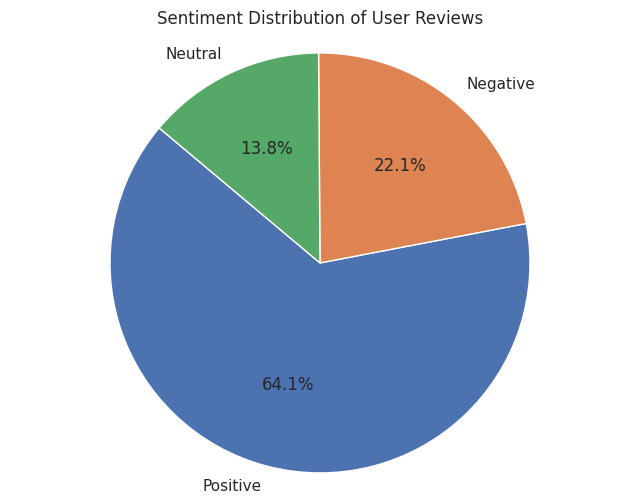

In [49]:
# Plotting a pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of User Reviews')
plt.axis('equal')
plt.show()

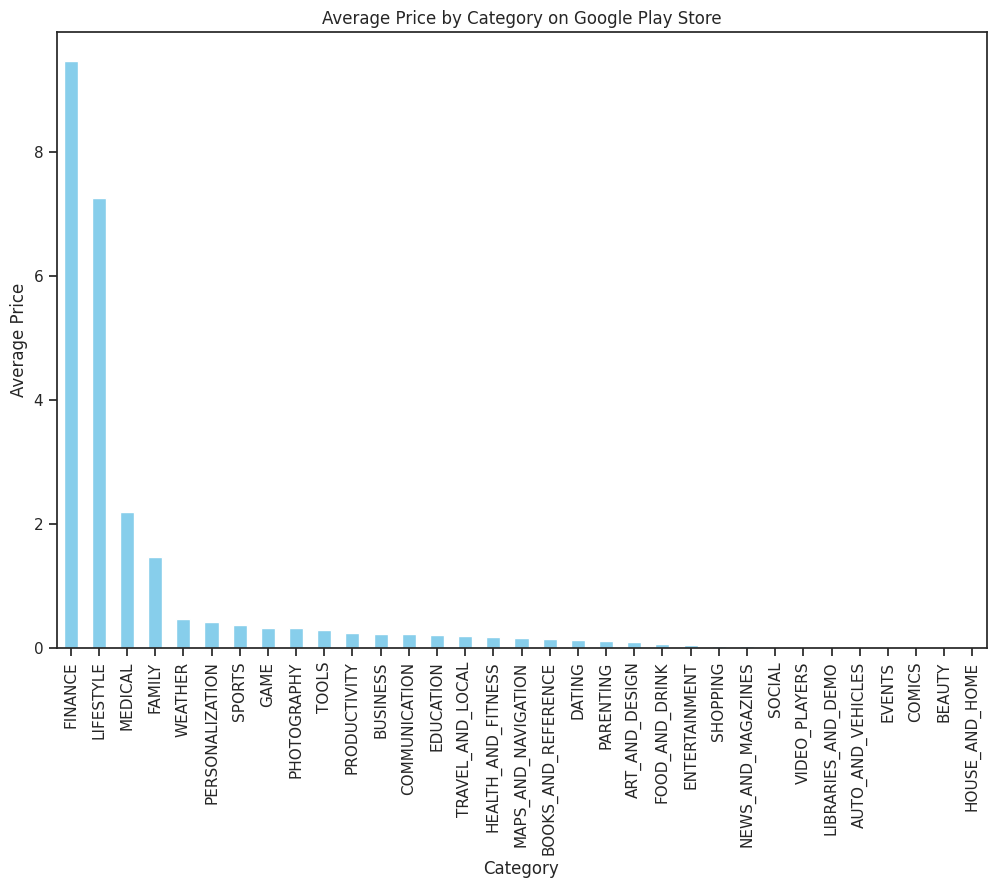

In [51]:

average_price_by_category = playstore_data.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Step 4: Data Visualization
plt.figure(figsize=(12, 8))
average_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price by Category on Google Play Store')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [55]:

# Select a few popular app categories
popular_app_cats =playstore_data [playstore_data["Category"].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

In [56]:
# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


Text(0.5, 1.0, 'App pricing trend across categories')

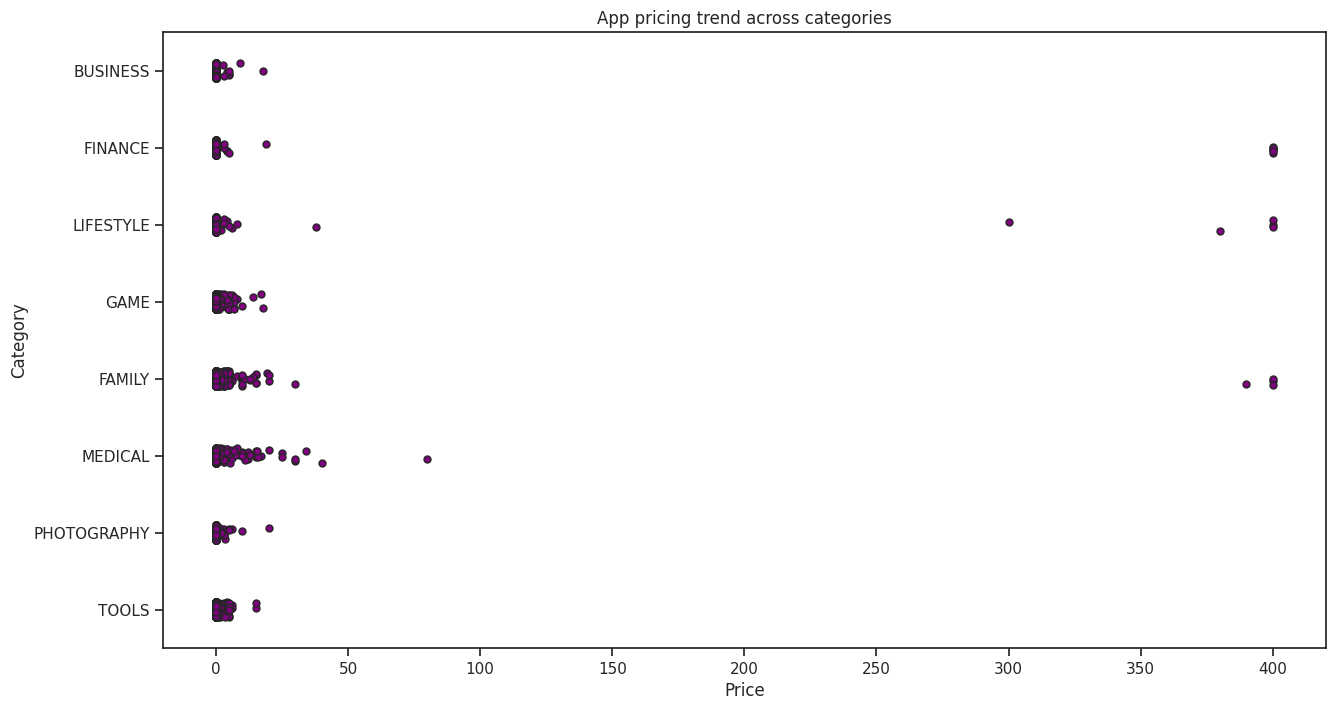

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x ='Price', y = 'Category',data=popular_app_cats, jitter=True, linewidth=1,color='purple')
ax.set_title('App pricing trend across categories')

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

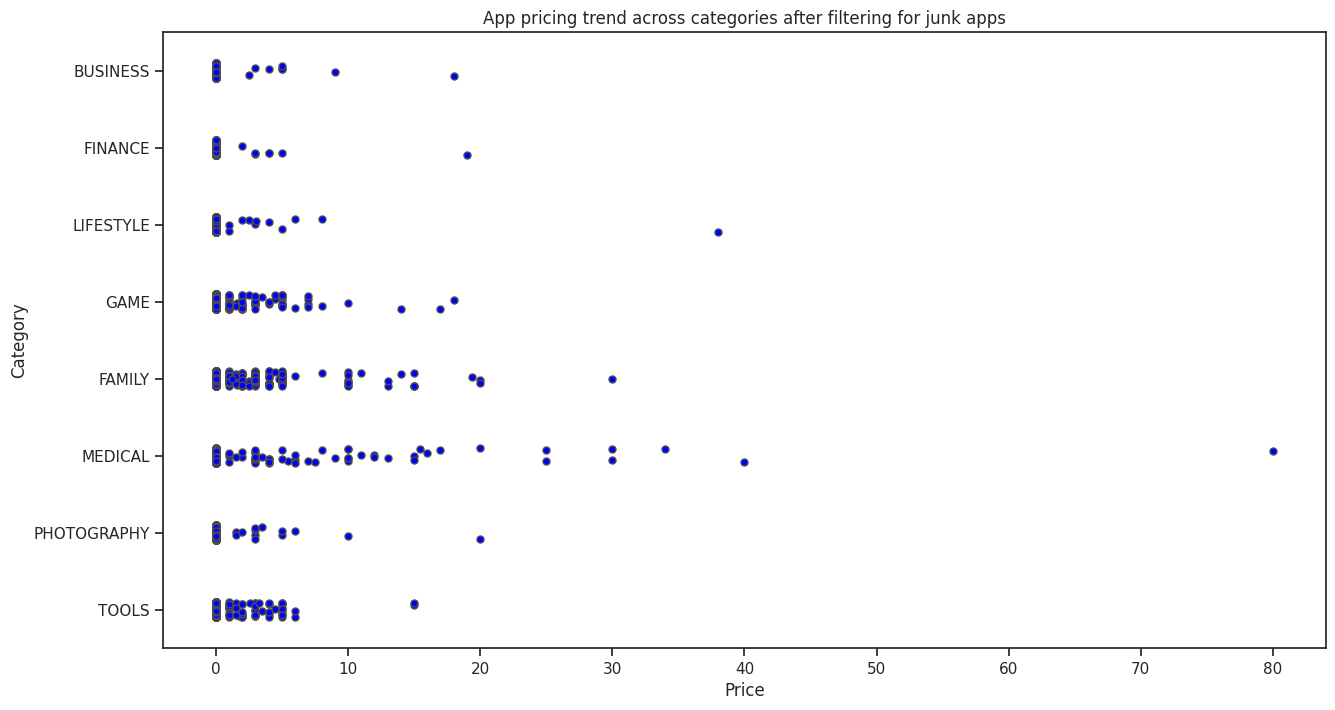

In [61]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,jitter=True,linewidth=1,color='blue')
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [65]:
# Join and merge the two dataframe
merged_df = pd.merge(playstore_data, playstore_reviews, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
merged_df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24064,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,"10,000,000+",Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.707778
24065,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,"10,000,000+",Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.505373
24066,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,"10,000,000+",Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.391497
24067,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,"10,000,000+",Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.720000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

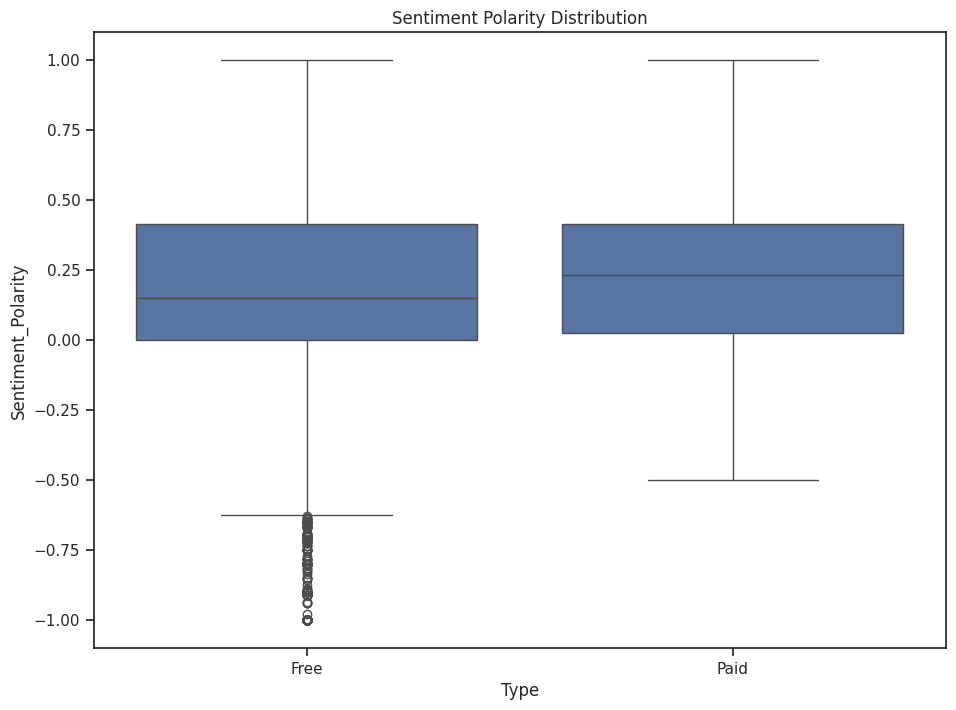

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
